# Using vispy to view epithelia 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
try:
    import seaborn as sns
except ImportError:
    print('Seabofn is not installed')
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom
from tyssue.core.generation import three_faces_sheet

from tyssue.draw.plt_draw import sheet_view, quick_edge_draw
# Grab the default settings for drawing
draw_specs = config.draw.sheet_spec()

In [2]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)
geom.update_all(sheet)

In [3]:
from tyssue.draw.vispy_draw import vp_view


In [5]:
scene, view = vp_view(sheet)

### Customization

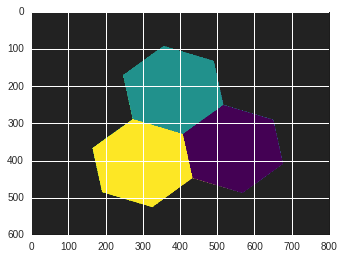

In [8]:
edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])
cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)

draw_specs['edge']['visible'] = True
draw_specs['edge']['color'] = edge_cmap

face_color = np.linspace(0.0, 1.0,
                         num=sheet.face_df.shape[0])
face_cmap = cmap(face_color)
draw_specs['face']['visible'] = True
draw_specs['face']['color'] = face_cmap
draw_specs['face']['alpha'] = 0.5


draw_specs['edge']['width'] = 2.
canvas, view = vp_view(sheet, **draw_specs)


fig, ax = plt.subplots()
ax.imshow(canvas.render())